In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

<Strong> Reading in the data as a DataFrame grabbing the headers , then , converting to a numpy array.</Strong>

In [41]:
df = pd.read_csv("../../cryptoData/ethDataHistoryHour.csv")

In [42]:
df_headers = list(df.columns)

In [43]:
float_data = df.values[:, 1: ,].astype(float)
print(float_data)

[[ 301.13     302.57     298.       301.61     125.66877]
 [ 301.61     303.28     300.       303.1      377.67246]
 [ 302.4      304.44     301.9      302.68     303.86672]
 ...
 [3808.86    3830.7     3808.18    3823.97    9175.9663 ]
 [3823.97    3845.      3823.97    3834.61    9226.6499 ]
 [3834.61    3838.51    3820.04    3822.37    6321.3643 ]]


<Strong> Creating a plot with open price </Strong>

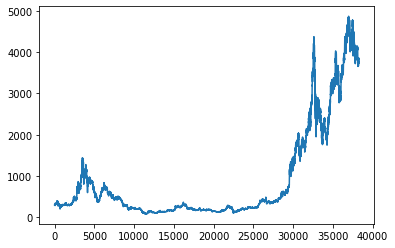

In [44]:
openPrice = float_data[:,1]
plt.plot( range ( len (openPrice) ) , openPrice )

<Strong> Plot of the first 120 hours on launch on Binance.</Strong>

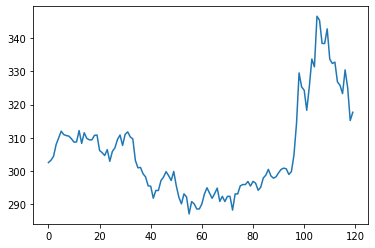

In [45]:
plt.plot(range(120) , openPrice[:120])

<Strong> Implementing my Baseline for Predicting the fluctuations in Crypto-currency Prices. </Strong>

<Strong> Target data-frame going up or down / Boolean </Strong>

In [50]:
df['result'] = (df['high'] > df['low']).astype(int)

<Strong> We have to move the result column up one , as the result is the prediction for the timeseries (n+1),  ex(If price is going up today and we predict it will go up tomorrow , result is found out tomorrow) </Strong>

<Strong> Results in an NaN at the bottom , because the last index is today , and we cant know until tomorrow happens. <Strong>

In [57]:
df['result'] = df['result'].shift(-1)
df.dropna(inplace=True)

In [58]:
df

,date,open,high,low,close,volume,result
0,2017-08-17 04:00:00.000,301.13,302.57,298.00,301.61,125.66877,1.0
1,2017-08-17 05:00:00.000,301.61,303.28,300.00,303.10,377.67246,1.0
2,2017-08-17 06:00:00.000,302.40,304.44,301.90,302.68,303.86672,1.0
3,2017-08-17 07:00:00.000,302.68,307.96,302.60,307.96,754.74510,1.0
4,2017-08-17 08:00:00.000,307.95,309.97,307.00,308.62,150.75029,1.0
...,...,...,...,...,...,...,...
38273,2022-01-03 03:00:00,3798.45,3806.36,3775.70,3785.00,7953.63510,1.0
38274,2022-01-03 04:00:00,3785.24,3799.73,3780.30,3791.87,5823.77290,1.0
38275,2022-01-03 05:00:00,3791.87,3822.99,3790.72,3812.13,8723.29020,1.0
38276,2022-01-03 06:00:00,3812.14,3817.02,3799.60,3803.17,5360.12070,1.0
